In [2]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [3]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:
print(trainX.shape)
print(trainy.shape)

(60000, 28, 28)
(60000,)


In [5]:
trainX = trainX / 255.0
testX = testX / 255.0

In [6]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [7]:
trainX = trainX.flatten().reshape(60000,784)

In [8]:
testX = testX.flatten().reshape(10000,784)

In [9]:
log = LogisticRegression(penalty = 'l2',solver = 'sag')

In [10]:
log.fit(trainX, trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

In [11]:
accuracy = log.score(testX, testy)
print(accuracy)

0.9255


In [12]:
model = Sequential()
model.add(Dense(500,input_dim=784,activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [15]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [16]:
history1 = model.fit(trainX,trainY,validation_data=(testX,testY),epochs=250, batch_size=16)

Epoch 1/250
3750/3750 [==============================] - 28s 7ms/step - loss: 0.4243 - accuracy: 0.8883 - val_loss: 0.2327 - val_accuracy: 0.9321
Epoch 2/250
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2090 - accuracy: 0.9398 - val_loss: 0.1745 - val_accuracy: 0.9486
Epoch 3/250
3750/3750 [==============================] - 27s 7ms/step - loss: 0.1577 - accuracy: 0.9547 - val_loss: 0.1398 - val_accuracy: 0.9577
Epoch 4/250
3750/3750 [==============================] - 28s 7ms/step - loss: 0.1264 - accuracy: 0.9642 - val_loss: 0.1218 - val_accuracy: 0.9642
Epoch 5/250
3750/3750 [==============================] - 27s 7ms/step - loss: 0.1049 - accuracy: 0.9699 - val_loss: 0.1061 - val_accuracy: 0.9673
Epoch 6/250
3750/3750 [==============================] - 28s 8ms/step - loss: 0.0887 - accuracy: 0.9748 - val_loss: 0.0913 - val_accuracy: 0.9729
Epoch 7/250
3750/3750 [==============================] - 28s 8ms/step - loss: 0.0766 - accuracy: 0.9783 - val_loss: 0.0853 -

In [17]:
y_pred = model.predict(testX)

313/313 [==============================] - 2s 7ms/step


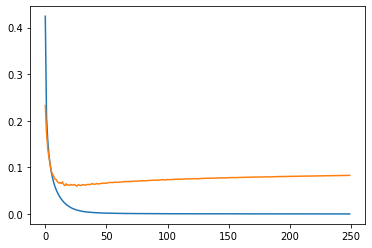

In [67]:
plt.figure()
plt.plot(history1.history["loss"], label="train")
plt.plot(history1.history["val_loss"], label="test")

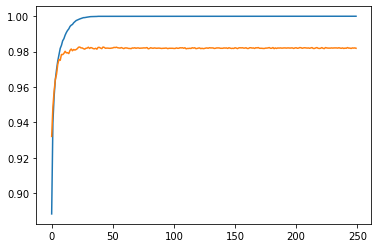

In [68]:
plt.plot(history1.history["accuracy"],label = "train")
plt.plot(history1.history["val_accuracy"],label = 'test')

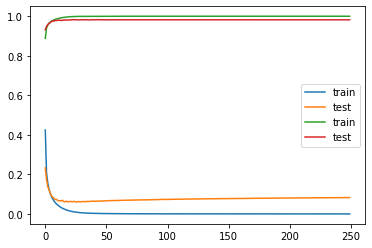

In [66]:
plt.figure()
plt.plot(history1.history["loss"], label="train")
plt.plot(history1.history["val_loss"], label="test")
plt.plot(history1.history["accuracy"],label = "train")
plt.plot(history1.history["val_accuracy"],label = 'test')
plt.legend()
plt.show()

In [19]:
modela = Sequential()
modela.add(Dense(500,input_dim=784,kernel_regularizer=l2(0.07),activation='relu'))
modela.add(Dense(500, activation='relu'))
modela.add(Dropout(0.2))
modela.add(Dense(10,activation='softmax'))

In [20]:
modela.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [21]:
history = modela.fit(trainX,trainY,validation_data=(testX,testY),epochs=250, batch_size=16)

Epoch 1/250
3750/3750 [==============================] - 36s 9ms/step - loss: 4.7943 - accuracy: 0.8624 - val_loss: 0.4972 - val_accuracy: 0.9095
Epoch 2/250
3750/3750 [==============================] - 34s 9ms/step - loss: 0.5002 - accuracy: 0.9016 - val_loss: 0.4418 - val_accuracy: 0.9154
Epoch 3/250
3750/3750 [==============================] - 34s 9ms/step - loss: 0.4541 - accuracy: 0.9105 - val_loss: 0.4132 - val_accuracy: 0.9183
Epoch 4/250
3750/3750 [==============================] - 36s 10ms/step - loss: 0.4285 - accuracy: 0.9158 - val_loss: 0.3758 - val_accuracy: 0.9300
Epoch 5/250
3750/3750 [==============================] - 34s 9ms/step - loss: 0.4094 - accuracy: 0.9219 - val_loss: 0.3819 - val_accuracy: 0.9306
Epoch 6/250
3750/3750 [==============================] - 36s 9ms/step - loss: 0.3996 - accuracy: 0.9242 - val_loss: 0.3515 - val_accuracy: 0.9416
Epoch 7/250
3750/3750 [==============================] - 35s 9ms/step - loss: 0.3936 - accuracy: 0.9259 - val_loss: 0.4190 

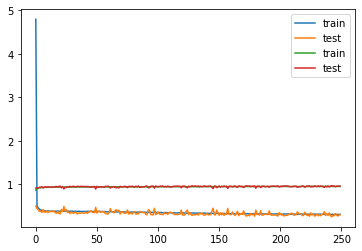

In [63]:
plt.figure()
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.plot(history.history["accuracy"],label = "train")
plt.plot(history.history["val_accuracy"],label = 'test')
plt.legend()
plt.show()

In [23]:
from keras.layers import Dense, Dropout, Flatten


In [24]:
def define_mod_reg1():
  model=Sequential()
  
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu', kernel_initializer='he_uniform',kernel_regularizer='l2'))
  model.add(Dropout(0.25))
  model.add(Dense(500, activation='relu', kernel_initializer='he_uniform',kernel_regularizer='l2'))
  model.add(Dropout(0.25))
  
  model.add(Dense(10, activation='softmax'))
    
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [26]:
from tensorflow.keras.layers import Conv2D

In [28]:
from keras.optimizers import SGD

In [53]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(500,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation = 'softmax'))

In [54]:
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

In [57]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [58]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [59]:
trainX = trainX / 255.0
testX = testX / 255.0

In [69]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)

In [ ]:
history = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=250, batch_size=32)

Epoch 1/250
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0146 - accuracy: 0.9982 - val_loss: 0.1450 - val_accuracy: 0.9888
Epoch 2/250
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0148 - accuracy: 0.9983 - val_loss: 0.2390 - val_accuracy: 0.9896
Epoch 3/250
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0135 - accuracy: 0.9983 - val_loss: 0.3014 - val_accuracy: 0.9923
Epoch 4/250
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0144 - accuracy: 0.9988 - val_loss: 0.2574 - val_accuracy: 0.9902
Epoch 5/250
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0160 - accuracy: 0.9985 - val_loss: 0.3041 - val_accuracy: 0.9896
Epoch 6/250
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0082 - accuracy: 0.9989 - val_loss: 0.2861 - val_accuracy: 0.9898
Epoch 7/250
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0126 - accuracy: 0.9990 - val_loss: 0

Comparison : with L2 regularization CNN accuracy is 99% while normal Neural network has accuracy of 95%.